### Machine Learning for Data Quality Prediction
**Description**: Use a machine learning model to predict data quality issues.

**Steps**:
1. Create a mock dataset with features and label (quality issue/label: 0: good, 1: issue).
2. Train a machine learning model.
3. Evaluate the model performance.

Sample Data:
    missing_values  outlier_score  inconsistent_format  duplicates  \
0               3       0.505252                    0           0   
1               4       0.826457                    0           0   
2               2       0.320050                    1           1   
3               4       0.895523                    0           1   
4               4       0.389202                    1           0   

   quality_label  
0              0  
1              1  
2              0  
3              0  
4              1  



--- Model Evaluation ---
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        76
           1       0.38      0.21      0.27        24

    accuracy                           0.73       100
   macro avg       0.58      0.55      0.55       100
weighted avg       0.69      0.73      0.70       100



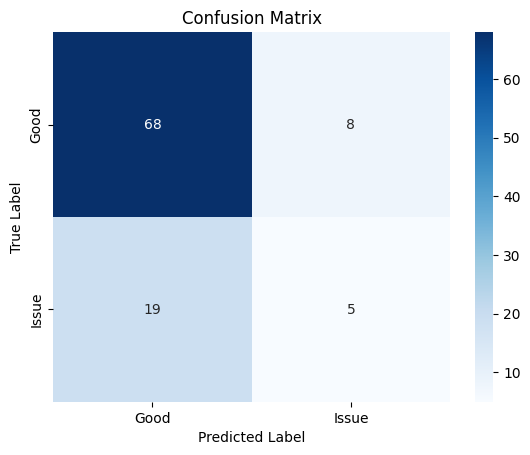

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------
# Step 1: Create Mock Dataset Safely
# -----------------------------------
def generate_mock_data(n_samples=500, random_seed=42):
    np.random.seed(random_seed)
    try:
        data = pd.DataFrame({
            'missing_values': np.random.randint(0, 5, n_samples),
            'outlier_score': np.random.rand(n_samples),
            'inconsistent_format': np.random.randint(0, 2, n_samples),
            'duplicates': np.random.randint(0, 2, n_samples),
            'quality_label': np.random.choice([0, 1], n_samples, p=[0.7, 0.3])
        })
        # Ensure no NaNs and correct types
        if data.isnull().values.any():
            raise ValueError("Generated dataset contains NaN values.")
        if not all(np.issubdtype(data[col].dtype, np.number) for col in data.columns):
            raise TypeError("Dataset contains non-numeric values.")
        return data
    except Exception as e:
        print("Error generating dataset:", e)
        return pd.DataFrame()

data = generate_mock_data()
if data.empty:
    raise SystemExit("Failed to generate a valid dataset.")

print("Sample Data:\n", data.head())

# --------------------------
# Step 2: Train ML Model
# --------------------------
X = data.drop('quality_label', axis=1)
y = data['quality_label']

try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
except Exception as e:
    print("Error during train/test split:", e)
    raise

# Optional: Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# --------------------------
# Step 3: Evaluate the Model
# --------------------------
y_pred = best_model.predict(X_test)

print("\n--- Model Evaluation ---")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good', 'Issue'],
            yticklabels=['Good', 'Issue'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
